In [1]:
# !pip install pandas matplotlib

In [2]:
import pandas as pd
import os
from datetime import datetime, time

Read each txt file in the specified directory

In [3]:
directory = 'speed_detection_data'
files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.txt')]

In [4]:
read_f = [pd.read_csv(file, usecols= ['Class','Direction','Speed','Time']) for file in files]
speed = pd.concat(read_f)
speed['Time'] = pd.to_datetime(speed['Time'], format="%Y-%m-%d %H:%M")
# Add weekday field
speed['Weekday'] = speed['Time'].dt.day_name()
# Days should be ordered for plots
speed['Weekday'] =  pd.Categorical(speed['Weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
speed.head()

,Class,Direction,Speed,Time,Weekday
0,car,in,30,2020-02-24 07:04:54,Monday
1,truck,out,29,2020-02-24 07:04:54,Monday
2,car,in,29,2020-02-24 07:05:15,Monday
3,car,in,33,2020-02-24 07:05:37,Monday
4,car,in,27,2020-02-24 07:05:40,Monday


### Times of day

Calculate minute by minute average for each day

In [5]:
minutes = speed.groupby([speed['Time'].map(lambda x : time(x.hour, x.minute)), 'Weekday'])\
                                        .mean().round(0).reset_index()
minutes.head()

,Time,Weekday,Speed
0,07:00:00,Monday,NaN
1,07:00:00,Tuesday,21.0
2,07:00:00,Wednesday,33.0
3,07:00:00,Thursday,NaN
4,07:00:00,Friday,NaN


Reshape for plotting

In [6]:
# not all measurements were made at the same times of the day for each day
# backfill for plotting days in parallel without having gaps at time points
minutes = minutes.pivot(index='Time', columns='Weekday', values='Speed').fillna(method='backfill', axis=0)
minutes.head()

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
07:00:00,30.0,21.0,33.0,30.0,NaN,38.0,NaN
07:01:00,30.0,30.0,41.0,30.0,NaN,38.0,NaN
07:02:00,30.0,31.0,30.0,33.0,NaN,38.0,NaN
07:03:00,30.0,29.0,32.0,40.0,NaN,38.0,NaN
07:04:00,30.0,31.0,37.0,30.0,NaN,38.0,NaN


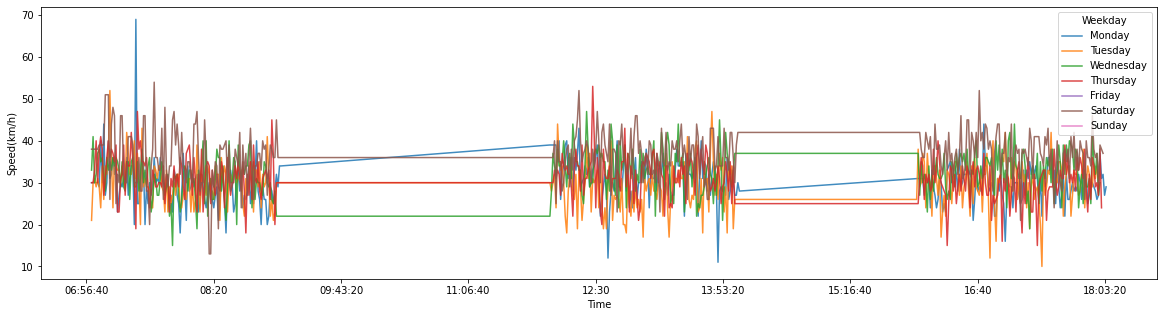

In [7]:
ax = minutes.plot.line(figsize=(20, 5), alpha= 0.85)
ax.set_ylabel('Speed(km/h)')
ax.figure.savefig('speed_detection_charts/days_line.png', bbox_inches = "tight")

### An average day

In [8]:
hours = speed.groupby([speed['Time'].map(lambda x : time(x.hour)), 'Class']).mean().round(0).reset_index()
hours.head()

,Time,Class,Speed
0,07:00:00,bus,33.0
1,07:00:00,car,31.0
2,07:00:00,truck,32.0
3,08:00:00,bus,33.0
4,08:00:00,car,30.0


Overall average speed of each class for times of day

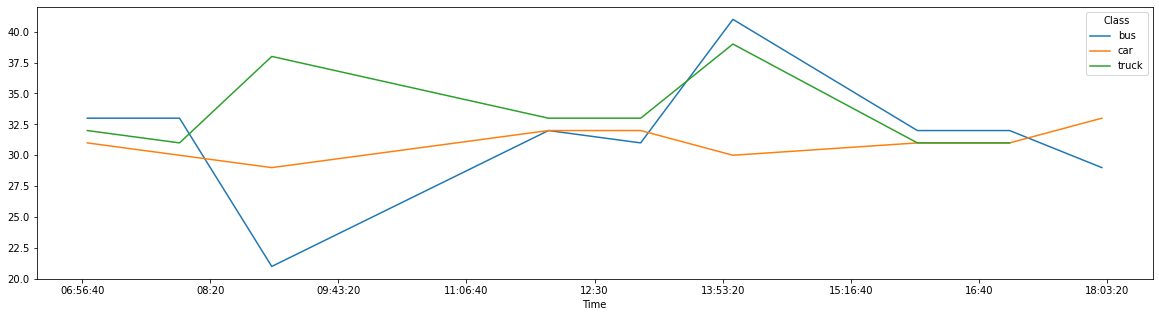

In [9]:
ax = hours.pivot(index='Time', columns='Class', values='Speed')\
                    .plot.line(figsize=(20, 5))
ax.figure.savefig('speed_detection_charts/class_times_of_day.png', bbox_inches = "tight")

Average speed of each class on each weekday

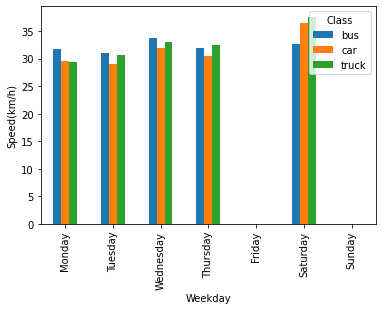

In [10]:
ax = speed.groupby(['Weekday', 'Class']).mean().reset_index()\
            .pivot(index='Weekday', columns='Class', values='Speed').plot.bar()
ax.set_ylabel('Speed(km/h)')
ax.figure.savefig('speed_detection_charts/speed_class_weekdays.png', bbox_inches = "tight")

Daily overall means

In [11]:
speed.groupby(['Weekday']).mean().reset_index()

,Weekday,Speed
0,Monday,29.607273
1,Tuesday,29.204578
2,Wednesday,32.120048
3,Thursday,30.716686
4,Friday,NaN
5,Saturday,36.448301
6,Sunday,NaN


Overall mean

In [12]:
speed.mean()

Speed    31.214937
dtype: float64